#Lab 3 : Convex Optimisation

Gradient Descent 

**Write the code following the instructions to obtain the desired results**

#Import all the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Find the value of $x$ at which $f(x)$ is minimum : 
1. Find $x$ analytically
2. Write the update equation of gradient descent
3. Find $x$ using gradient descent method 



**Example 1** : $f(x)$ = $x^{2}$ + $x$ + $2$

**Analytical** : $$\frac{d}{dx} f(x)=2x+1=0$$
$$\frac{d^{2}}{dx^{2}} f(x)=2~(Minima)$$
$$x=-\frac{1}{2}~(analytical~solution)$$

**Gradient Descent Update equation** : $$x_{init}=4$$
$$x_{updt}=x_{old}-\lambda (\frac{d}{dx} f(x)|x=x_{old})$$
$$x_{updt}=x_{old}-\lambda (2x_{old}+1)$$

**Gradient Descent Method** :

Follow the below steps and write your code in the block below

1. Generate $x$, 1000 data points from -10 to 10
2. Generate and Plot the function $f(x)$ = $x^{2}$ + $x$ + $2$
3. Initialize the starting point ($x_{init}$) and learning rate ($\lambda$)
4. Use Gradient descent algorithm to compute value of $x$ at which the function $f(x)$ is minimum
5. Also vary the learning rate and initialisation point and plot your observations

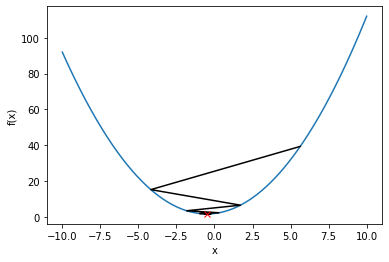

Value of x where f(x) takes it's minimum value is close to -0.5


In [127]:
# Generating 1000 points from -10 to 10
x = np.linspace(-10,10,1000)
# Genrating the plot for f(x)
y = x**2 + x + 2
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
# Initializing the starting point and learning rate
x_init = np.random.choice(x)
lr = 0.8
# Gradient descent algorithm
iter = 1800
def loss(x):
    return (grad(x)**2)

def grad(x):
    return 2*x + 1

def double_diff(x):
    return 2        # stationary point is minima

def grad_desc(x_init,lr,display = False,iter = 1800):
    x = x_init
    num = 0
    traversed_data = {}
    if display:
        while num < iter:
            x_updt =  x - (lr * grad(x))
            x = x_updt
            num += 1
        return loss(x)
    else:
        while num < iter:
            traversed_data[x] = x**2 + x + 2
            x_updt =  x - (lr * grad(x))
            x = x_updt
            num += 1
        return traversed_data

def display_obser():
    ls_lr = np.linspace(0,1,10)
    ls_x = np.random.choice(x,size = ls_lr.shape)
    ls_x = np.array(ls_x)
    ls_x,ls_lr = np.meshgrid(ls_x,ls_lr)
    loss_arr = grad_desc(ls_x,ls_lr,True,100)
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter3D(ls_x,ls_lr,loss_arr,cmap = 'viridis',c = loss_arr)
    ax.set_xlabel('starting point',linespacing = 3.3)
    ax.set_ylabel('learning rates',linespacing = 3.2)
    ax.set_zlabel('loss', linespacing = 3.0)
    ax.dist = 11
    plt.show()
    print(f'Start points when loss value is greater than 10\n {ls_x[loss_arr > 10]}\n')
    print(f'learning rates when loss value is greater than 10\n {ls_lr[loss_arr > 10]}')
    return

traversed_data = grad_desc(x_init,lr)
key,value = list(traversed_data.keys()),list(traversed_data.values())
plt.plot(key,value,'black')
plt.plot(key[-1],value[-1],'rx')
plt.show()
print(f'Value of x where f(x) takes it\'s minimum value is close to {key[-1]}')

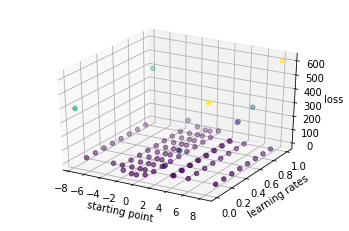

Start points when loss value is greater than 10
 [-3.03303303 -7.51751752  4.97497497  8.21821822  3.25325325  0.81081081
  3.13313313 -1.85185185 -3.03303303 -7.51751752  4.97497497  8.21821822
  3.25325325  0.81081081  3.13313313 -1.85185185]

learning rates when loss value is greater than 10
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


In [128]:
display_obser()

**Example 2** : $f(x)=x sinx$

**Analytical** : Find solution analytically

**Gradient Descent Update equation** : Write Gradient descent update equations

**Gradient Descent Method** :

Follow the below steps and write your code in the block below

1. Generate $x$, 1000 data points from -10 to 10
2. Generate and Plot the function $f(x)$ = $x^{2}$ + $x$ + $2$
3. Initialize the starting point ($x_{init}$) and learning rate ($\lambda$)
4. Use Gradient descent algorithm to compute value of $x$ at which the function $f(x)$ is minimum
5. Also vary the learning rate and initialisation point and plot your observations

**Analytical Solution:**$$ f(x) = xsinx $$
$$\frac{d}{dx} f(x)=xcosx+sinx=0$$
$$\frac{d^{2}}{dx^{2}} f(x)=cosx - xsinx + cosx > 0~(Minima)$$
\begin{equation}
f(x) = xsinx = f(-x)
\end{equation}

$$~f(x) ~is ~symmetric ~and ~has ~infinite ~minima ~and ~For ~x ~in ~the ~range (-10,10) ~we ~have ~3 ~minimas ~at,\\ ~x = -4.91318~,0~,4.91318\\ $$

**Gradient Descent Update Equations:**
$$x_{init}= 2$$
$$x_{updt}=x_{old}-\lambda~\big{(}\frac{d}{dx} f(x)|x=x_{old}\big{)}$$
$$x_{updt}=x_{old}-\lambda~(xcosx + sinx)$$

**Gradient Descent Method :**

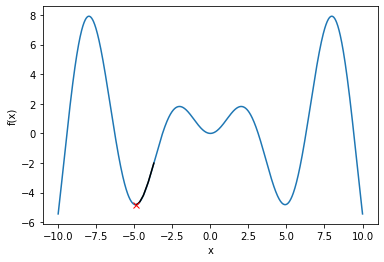

One of the local minima's to which our Gradient Descent converges is close to -4.913180439434884


In [151]:
# Generating 1000 points from -10 to 10
x = np.linspace(-10,10,1000)
# Genrating the plot for f(x)
y = x * np.sin(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
# Initializing the starting point and learning rate
x_init = np.random.choice(x)
lr = 0.1
# Gradient descent algorithm
iter = 1800
def loss(x):
    return (grad(x) ** 2) * double_diff(x) # double_diff(x) is used to know whether the stationary point in minima or maxima

def grad(x):
    return x * np.cos(x) + np.sin(x)

def double_diff(x):
    return 2 * np.cos(x) - x * np.sin(x) # stationary point can be positive or negative

def grad_desc(x_init,lr,display = False,iter = 100):
    x = x_init
    num = 0
    traversed_data = {}
    if display:
        while num < iter:
            x_updt =  x - (lr * grad(x))
            x = x_updt
            num += 1
        return loss(x)
    else:
        while num < iter:
            traversed_data[x] = x * np.sin(x)
            x_updt =  x - (lr * grad(x))
            x = x_updt
            num += 1
        return traversed_data

def display_obser():
    ls_lr = np.linspace(0,1,20)
    ls_x = np.random.choice(x,size = ls_lr.shape)
    ls_x = np.array(ls_x)
    ls_x,ls_lr = np.meshgrid(ls_x,ls_lr)
    loss_arr = grad_desc(ls_x,ls_lr,True,200)
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter3D(ls_x,ls_lr,loss_arr,cmap = 'viridis',c = loss_arr)
    ax.set_xlabel('starting point',linespacing = 3.3)
    ax.set_ylabel('learning rates',linespacing = 3.2)
    ax.set_zlabel('loss', linespacing = 3.0)
    ax.dist = 11
    plt.show()
    print(f'Start points when loss value is greater than 200\n {ls_x[loss_arr > 200]}\n')
    print(f'learning rates when loss value is greater than 200\n {ls_lr[loss_arr > 200]}')
    return

traversed_data = grad_desc(x_init,lr)
key,value = list(traversed_data.keys()),list(traversed_data.values())
plt.plot(key,value,'black')
plt.plot(key[-1],value[-1],'rx')
plt.show()
print(f'One of the local minima\'s to which our Gradient Descent converges is close to {key[-1]}')

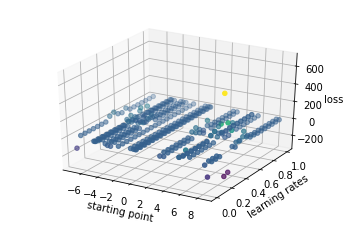

Start points when loss value is greater than 200
 [8.15815816 8.4984985  8.4984985  8.4984985 ]

learning rates when loss value is greater than 200
 [0.21052632 0.21052632 0.26315789 0.31578947]


In [152]:
display_obser()

#Find the value of $x$ and $y$ at which $f(x,y)$ is minimum :



**Example 1** : $f(x,y)$ = $x^{2}+y^{2}+2x+2y$

**Gradient Descent Method** :

Follow the below steps and write your code in the block below

1. Generate $x$ and $y$, 1000 data points from -10 to 10
2. Generate and Plot the function $f(x,y)$ = $x^{2}+y^{2}+2x+2y$
3. Initialize the starting point ($x_{init}$,$y_{init}$) and learning rate ($\lambda$)
4. Use Gradient descent algorithm to compute value of $x$ and $y$ at which the function $f(x,y)$ is minimum
5. Also vary the learning rate and initialisation point and plot your observations

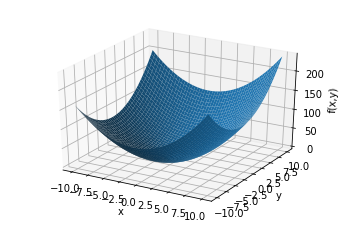

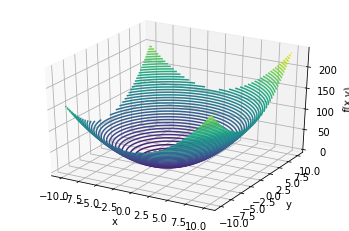

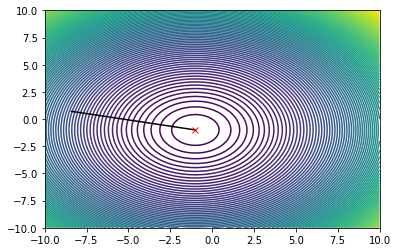


The value of x and y at which the function f(x,y) is minimum is close to -1.0000000000000004, -0.9999999999999998


In [182]:
#1. Generate x,y 1000 data points from -10 to 10
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
#2. Plot the function f(x,y)
def f(x,y):
    return x**2 + y**2 + 2*x + 2*y
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,f(X,Y))
ax.set_xlabel('x',linespacing = 3.3)
ax.set_ylabel('y', linespacing = 3.3)
ax.set_zlabel('f(x,y)', linespacing = 3.0)
ax.dist = 11
plt.show()
#3. Initialize the starting point and learning rate
x_init = np.random.choice(x)
y_init = np.random.choice(y)
lr = 0.1
iter = 1800
#4. Using Gradient Descent
def loss(x,y):
    return (grad_x(x) ** 2) * (grad_y(y) ** 2)

def grad_x(x):
    return 2*x + 2

def grad_y(y):
    return 2*y + 2

def double_diff(x,y):
    return 2,2  # double derivatives w.r.t both x,y are positive. Stationary point can be either saddle point or minima

def grad_desc_3d(x_init,y_init,lr,display = False,iter = 1800):
    x = x_init
    y = y_init
    num = 0
    traversed_data_3d = {}
    if display:
        while num < iter:
            x_updt =  x - (lr * grad_x(x))
            y_updt =  y - (lr * grad_y(y))
            x = x_updt
            y = y_updt
            num += 1
        return loss(x,y)
    else:
        while num < iter:
            traversed_data_3d[x] = y
            x_updt =  x - (lr * grad_x(x))
            y_updt = y - (lr * grad_y(y))
            x = x_updt
            y = y_updt
            num += 1
        return traversed_data_3d

def display_obser():
    lr_arr = np.linspace(0,1,20)
    x_arr = np.random.choice(x,size = lr_arr.shape)
    y_arr = np.random.choice(y,size = lr_arr.shape)
    x_arr,y_arr,lr_arr = np.meshgrid(x_arr,y_arr,lr_arr)
    loss_arr = grad_desc_3d(x_arr,y_arr,lr_arr,True,50)
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter3D(x_arr,y_arr,loss_arr,cmap = 'viridis',c = lr_arr)
    ax.set_xlabel('x_coordinate',linespacing = 3.3)
    ax.set_ylabel('y_coordinate',linespacing = 3.2)
    ax.set_zlabel('loss', linespacing = 3.0)
    ax.dist = 11
    plt.show()
    points = np.column_stack((x_arr[loss_arr > 10],y_arr[loss_arr > 10]))
    print(f'Start points when loss value is greater than 10\n {points}\n')
    print(f'learning rates when loss value is greater than 10\n {lr_arr[loss_arr > 10]}')
    return

traversed_data_3d = grad_desc_3d(x_init,y_init,lr)
fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,f(X,Y),50,cmap = 'viridis')
ax.set_xlabel('x',linespacing = 3.3)
ax.set_ylabel('y', linespacing = 3.3)
ax.set_zlabel('f(x,y)', linespacing = 3.0)
ax.dist = 10
plt.show()

fig3 = plt.figure()
ax = plt.axes()
ax.contour(X,Y,f(X,Y),100,cmap = 'viridis')
x,y = zip(*traversed_data_3d.items())
ax.plot(x,y,'black')
ax.plot(x[-1],y[-1],'rx')
plt.show()

print(f'\nThe value of x and y at which the function f(x,y) is minimum is close to {x[-1]}, {y[-1]}')

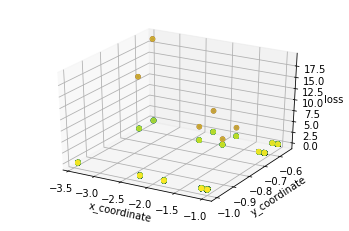

Start points when loss value is greater than 10
 [[-3.42430719 -0.64123796]
 [-3.42430719 -0.64123796]
 [-3.42430719 -0.64123796]
 [-3.42430719 -0.64123796]
 [-3.42430719 -0.55154745]
 [-3.42430719 -0.55154745]
 [-3.42430719 -0.55154745]
 [-3.42430719 -0.55154745]]

learning rates when loss value is greater than 10
 [0. 1. 0. 1. 0. 1. 0. 1.]


In [183]:
display_obser()

**Example 2** : $f(x,y)$ = $xsin(x)+ysin(y)$

**Gradient Descent Method** :

Follow the below steps and write your code in the block below

1. Generate $x$ and $y$, 1000 data points from -10 to 10
2. Generate and Plot the function $f(x,y)$ = $xsin(x)+ysin(y)$
3. Initialize the starting point ($x_{init}$,$y_{init}$) and learning rate ($\lambda$)
4. Use Gradient descent algorithm to compute value of $x$ and $y$ at which the function $f(x,y)$ is minimum
5. Also vary the learning rate and initialisation point and plot your observations

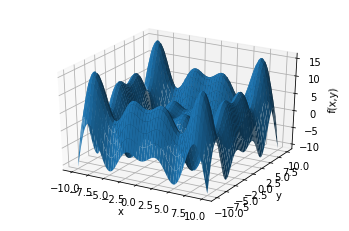

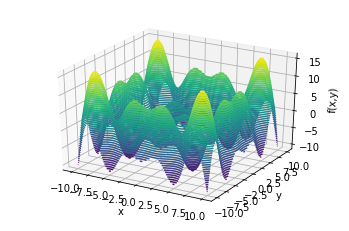

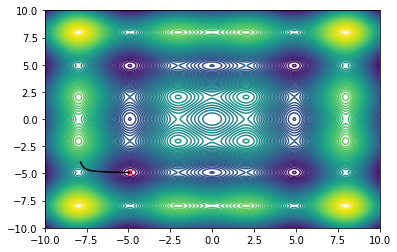


The value of x and y at which the function f(x,y) is minimum is close to -4.913180439434884, -4.913180439434884


In [218]:
#1. Generate x,y 1000 data points from -10 to 10
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
#2. Plot the function f(x,y)
def f(x,y):
    return x * np.sin(x) + y * np.sin(y)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,f(X,Y))
ax.set_xlabel('x',linespacing = 3.3)
ax.set_ylabel('y', linespacing = 3.3)
ax.set_zlabel('f(x,y)', linespacing = 3.0)
ax.dist = 11
plt.show()
#3. Initialize the starting point and learning rate
x_init = np.random.choice(x)
y_init = np.random.choice(y)
lr = 0.1
iter = 1800
#4. Using Gradient Descent
def loss(x,y):
    return grad_x(x) * grad_y(y) * is_max(x) * check_max(y)

def grad_x(x):
    return x * np.cos(x) + np.sin(x)

def grad_y(y):
    return y * np.cos(y) + np.sin(y)

def is_max(x):
    temp = 2 * np.cos(x) - x * np.sin(x)
    return 1 if np.all(temp > 0)  else -1

def check_max(y):
    temp = 2 * np.cos(y) - y * np.sin(y)
    return 1 if np.all(temp > 0) else -1

def grad_desc_3d(x_init,y_init,lr,display = False,iter = 1800):
    x = x_init
    y = y_init
    num = 0
    traversed_data_3d = {}
    if display == True:
        while num < iter:
            x_updt =  x - (lr * grad_x(x))
            y_updt = y - (lr * grad_y(y))
            x = x_updt
            y = y_updt
            num += 1
        return loss(x,y)
    else:
        while num < iter:
            traversed_data_3d[x] = y
            x_updt =  x - (lr * grad_x(x))
            y_updt = y - (lr * grad_y(y))
            x = x_updt
            y = y_updt
            num += 1
        return traversed_data_3d

def display_obser():
    lr_arr = np.linspace(0,1,10)
    x_arr = np.random.choice(x,size = lr_arr.shape)
    y_arr = np.random.choice(y,size = lr_arr.shape)
    x_arr,y_arr,lr_arr = np.meshgrid(x_arr,y_arr,lr_arr)
    loss_arr = grad_desc_3d(x_arr,y_arr,lr_arr,True,50)
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter3D(x_arr,y_arr,loss_arr,cmap = 'viridis',c = lr_arr)
    ax.set_xlabel('x_coordinate',linespacing = 3.3)
    ax.set_ylabel('y_coordinate',linespacing = 3.2)
    ax.set_zlabel('loss', linespacing = 3.0)
    ax.dist = 11
    plt.show()
    points = np.column_stack((x_arr[loss_arr > 10],y_arr[loss_arr > 10]))
    print(f'Start points when loss value is greater than 10\n {points}\n')
    print(f'learning rates when loss value is greater than 10\n {lr_arr[loss_arr > 10]}')
    return

traversed_data_3d = grad_desc_3d(x_init,y_init,lr)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,f(X,Y),50,cmap = 'viridis')
ax.set_xlabel('x',linespacing = 3.3)
ax.set_ylabel('y', linespacing = 3.3)
ax.set_zlabel('f(x,y)', linespacing = 3.0)
ax.dist = 11
plt.show()

fig3 = plt.figure()
ax = plt.axes()
ax.contour(X,Y,f(X,Y),100,cmap = 'viridis')
x,y = zip(*traversed_data_3d.items())
ax.plot(x,y,'black')
ax.plot(x[-1],y[-1],'rx')
plt.show()

print(f'\nThe value of x and y at which the function f(x,y) is minimum is close to {x[-1]}, {y[-1]}')

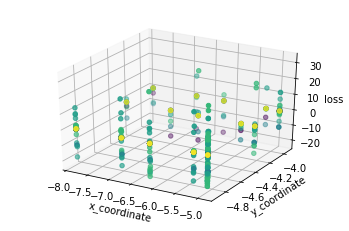

Start points when loss value is greater than 10
 [[-4.91318966 -4.91318044]
 [-6.18510529 -4.91318044]
 [-7.85785786 -4.91318044]
 [-4.91318046 -4.91318044]
 [-4.91322068 -4.91318044]
 [-6.82196723 -4.91318044]
 [-5.21871875 -4.91318044]
 [-4.91318046 -3.95395395]
 [-4.91322068 -3.95395395]
 [-6.82196723 -3.95395395]
 [-5.21871875 -3.95395395]
 [-4.91318046 -4.91291803]
 [-4.9131997  -4.91291803]
 [-6.18510529 -4.91291803]
 [-4.91318046 -4.2984928 ]
 [-4.9131997  -4.2984928 ]
 [-6.18510529 -4.2984928 ]
 [-4.91318966 -4.91318044]
 [-4.91318046 -4.91318044]
 [-4.91318044 -4.91318044]
 [-4.91318966 -4.91318044]
 [-4.91322068 -4.91318044]
 [-6.82196723 -4.91318044]
 [-5.21871875 -4.91318044]
 [-4.91318046 -4.90819099]
 [-4.91322068 -4.90819099]
 [-6.82196723 -4.90819099]
 [-5.21871875 -4.90819099]
 [-4.91318966 -4.91318044]]

learning rates when loss value is greater than 10
 [0.66666667 0.55555556 0.55555556 0.55555556 0.55555556 0.55555556
 0.55555556 0.55555556 0.55555556 0.55555556 0.5

In [219]:
display_obser()